In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Kaggle Installation
!pip install -q kaggle
#Create Kaggle Folder
!mkdir ~/.kaggle/
# copy kaggle.json in ~/.kaggle/
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6368        245  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2181         55  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2301         47  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [ ]:
!kaggle datasets download -d niharika41298/yoga-poses-dataset

100% 287M/288M [00:14<00:00, 23.4MB/s]
100% 288M/288M [00:14<00:00, 20.6MB/s]


In [ ]:
from zipfile import ZipFile

data_path = '/content/yoga-poses-dataset.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150,150)

In [ ]:
def load_data():

    datasets = ['/content/DATASET/TRAIN', '/content/DATASET/TEST']
    output = []

    # Iterate through the training and test set.
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each Subfolder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE)

                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        # Shuffle the images to introduce some randomness in our data
        images, labels = shuffle(images, labels)


        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/DATASET/TRAIN


100%|██████████| 266/266 [00:06<00:00, 43.24it/s]


Loading /content/DATASET/TEST


100%|██████████| 115/115 [00:03<00:00, 34.81it/s]


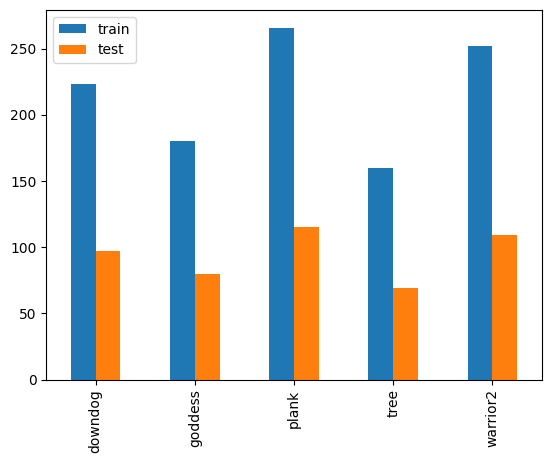

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 28, epochs=15, validation_split = 0.3)

Epoch 1/15
27/27 [==============================] - 14s 62ms/step - loss: 1.6102 - accuracy: 0.2315 - val_loss: 1.5869 - val_accuracy: 0.2308
Epoch 2/15
27/27 [==============================] - 1s 28ms/step - loss: 1.5952 - accuracy: 0.2526 - val_loss: 1.5424 - val_accuracy: 0.4215
Epoch 3/15
27/27 [==============================] - 1s 27ms/step - loss: 1.4829 - accuracy: 0.3677 - val_loss: 1.2920 - val_accuracy: 0.5292
Epoch 4/15
27/27 [==============================] - 1s 26ms/step - loss: 1.3269 - accuracy: 0.4352 - val_loss: 1.2250 - val_accuracy: 0.5631
Epoch 5/15
27/27 [==============================] - 1s 28ms/step - loss: 1.1815 - accuracy: 0.5172 - val_loss: 1.0075 - val_accuracy: 0.6092
Epoch 6/15
27/27 [==============================] - 1s 28ms/step - loss: 1.0179 - accuracy: 0.5767 - val_loss: 0.9518 - val_accuracy: 0.6431
Epoch 7/15
27/27 [==============================] - 1s 28ms/step - loss: 0.9466 - accuracy: 0.5992 - val_loss: 0.9447 - val_accuracy: 0.6031
Epoch 8/15
2

# To visualize how our model is performing, we plot the accuracy and the loss during the training

In [ ]:
def plot_performance(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training_accuracy vs Validation_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training_loss vs Validation_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

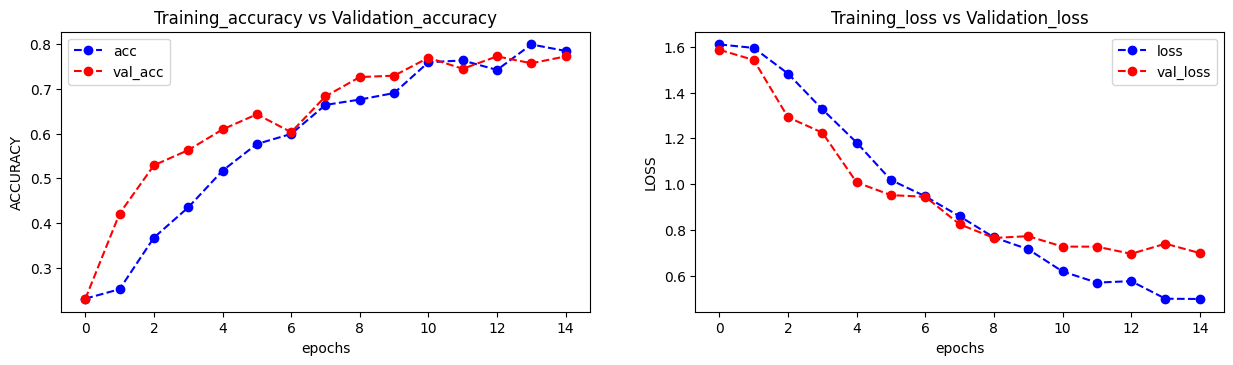

In [ ]:
plot_performance(history)

# **The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.
# Reason could be insufficient training data and hence it could be improved by adding more training data.

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 25ms/step - loss: 0.3595 - accuracy: 0.9021


# We now make predictions on the test data set.

In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  # np.argmax is used since each prediction would be an array of...
                                             # probabilities and we need to pick the max value.
pred_labels

15/15 [==============================] - 0s 10ms/step


array([4, 4, 1, 0, 4, 0, 1, 1, 0, 4, 4, 1, 2, 0, 2, 0, 3, 0, 1, 1, 4, 4,
       4, 3, 4, 2, 0, 4, 3, 2, 4, 4, 0, 1, 0, 2, 3, 0, 3, 0, 1, 4, 2, 0,
       2, 2, 0, 3, 0, 0, 2, 4, 4, 2, 2, 2, 3, 3, 2, 3, 1, 4, 2, 3, 4, 4,
       1, 1, 2, 2, 0, 4, 4, 0, 1, 2, 4, 2, 3, 1, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 2, 4, 0, 2, 4, 3, 2, 1, 2, 3, 3, 1, 0, 4, 2, 0, 0, 2, 1, 0, 2,
       1, 3, 4, 1, 0, 4, 0, 0, 1, 0, 4, 2, 3, 1, 1, 3, 1, 4, 2, 0, 0, 2,
       4, 0, 2, 2, 4, 1, 4, 2, 4, 3, 2, 4, 4, 3, 0, 2, 0, 4, 2, 2, 4, 3,
       0, 2, 3, 1, 4, 2, 2, 4, 3, 2, 4, 0, 2, 2, 2, 4, 4, 2, 4, 2, 0, 0,
       3, 2, 2, 4, 0, 1, 0, 2, 1, 4, 4, 0, 3, 1, 3, 2, 4, 3, 0, 4, 2, 0,
       4, 1, 1, 3, 3, 2, 4, 4, 3, 4, 2, 2, 2, 4, 3, 2, 2, 2, 2, 3, 1, 1,
       2, 4, 2, 3, 4, 0, 1, 4, 0, 2, 0, 0, 0, 0, 0, 2, 2, 4, 3, 1, 3, 0,
       4, 0, 2, 2, 0, 1, 1, 3, 0, 2, 1, 2, 4, 3, 0, 2, 4, 4, 3, 0, 0, 2,
       0, 0, 2, 1, 4, 0, 0, 2, 0, 1, 4, 4, 4, 2, 4, 0, 0, 4, 3, 4, 4, 4,
       4, 2, 2, 0, 4, 0, 4, 0, 2, 4, 0, 2, 2, 4, 2,

# Plotting the images along with their actual class and predicted class would give us a proper idea about how our model is making predictions.

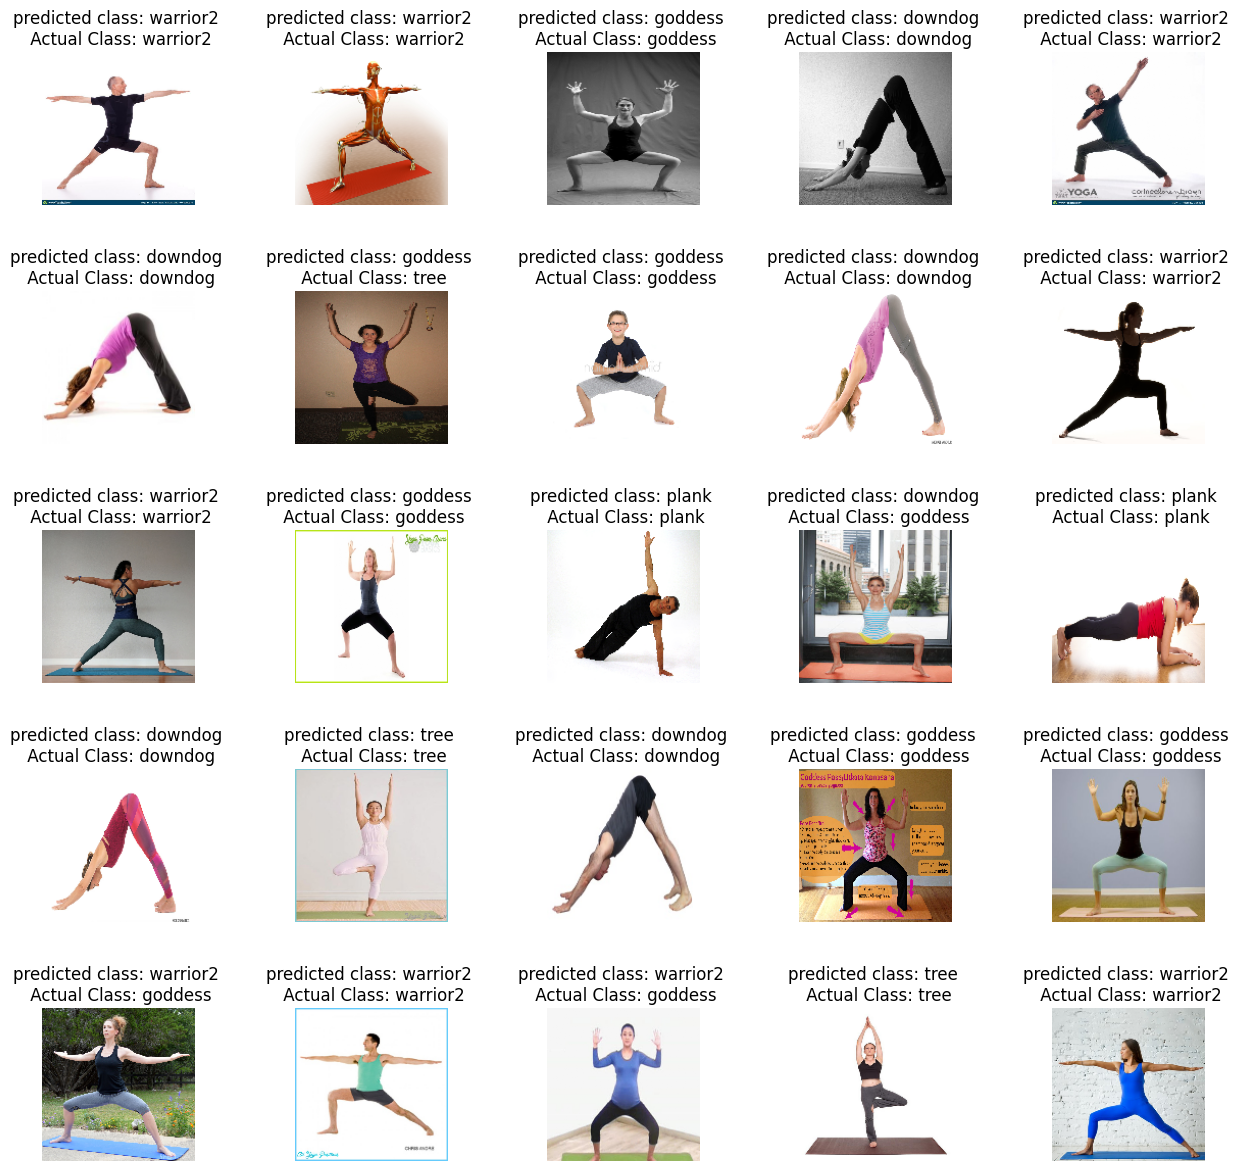

In [ ]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
ax = ax.ravel()

for i in range(0,25):
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

# A basic CNN model is created, Any suggestions to improve the model are welcome.